In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from matplotlib import pyplot as plt

C:\Users\wjssm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
time_points = np.linspace(0, 8*np.pi, 5000)

seq_length = 5
dataX = []
dataY = []
for i in range(0, len(time_points) - seq_length, 1):
    seq_in = time_points[i:i + seq_length]
    seq_out = np.sin(time_points)[i]
    dataX.append([seq_in])
    dataY.append(seq_out)

X = np.reshape(dataX, (len(dataX), seq_length, 1)) #numpy as np
y = np.reshape(dataY, (len(dataY), 1))

In [133]:
X.shape

(4995, 5, 1)

In [134]:
y.shape

(4995, 1)

## keras

In [50]:
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=30, batch_size=10, verbose=2, validation_split=0.3)

Train on 3496 samples, validate on 1499 samples
Epoch 1/30
 - 5s - loss: 0.4577 - val_loss: 0.4824
Epoch 2/30
 - 2s - loss: 0.2948 - val_loss: 0.7310
Epoch 3/30
 - 2s - loss: 0.0863 - val_loss: 1.8026
Epoch 4/30
 - 2s - loss: 0.0019 - val_loss: 1.9716
Epoch 5/30
 - 2s - loss: 8.1832e-04 - val_loss: 1.8939
Epoch 6/30
 - 2s - loss: 0.0023 - val_loss: 1.7771
Epoch 7/30
 - 2s - loss: 4.1135e-04 - val_loss: 1.8498
Epoch 8/30
 - 2s - loss: 5.5722e-04 - val_loss: 1.8169
Epoch 9/30
 - 2s - loss: 0.0015 - val_loss: 1.7298
Epoch 10/30
 - 2s - loss: 0.0016 - val_loss: 1.7760
Epoch 11/30
 - 2s - loss: 6.0945e-04 - val_loss: 1.6974
Epoch 12/30
 - 2s - loss: 4.3043e-04 - val_loss: 1.7122
Epoch 13/30
 - 2s - loss: 2.5880e-04 - val_loss: 1.6637
Epoch 14/30
 - 2s - loss: 0.0035 - val_loss: 1.5794
Epoch 15/30
 - 2s - loss: 1.2714e-04 - val_loss: 1.6170
Epoch 16/30
 - 2s - loss: 1.7206e-04 - val_loss: 1.6251
Epoch 17/30
 - 2s - loss: 4.0013e-04 - val_loss: 1.5855
Epoch 18/30
 - 2s - loss: 3.9320e-04 - va

In [51]:
y_hat = model.predict(X)

In [52]:
X.shape

(4995, 5, 1)

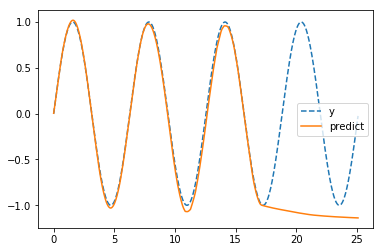

In [53]:
plt.plot(X[:,0,:],y,linestyle="dashed")
plt.plot(X[:,0,:],y_hat)
plt.legend(["y","predict"])

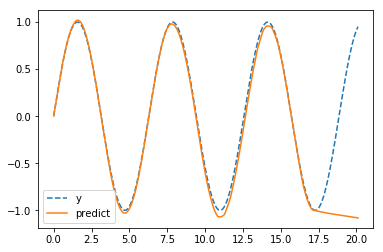

In [54]:
plt.plot(X[:4000,0,:],y[:4000],linestyle="dashed")
plt.plot(X[:4000,0,:],y_hat[:4000])
plt.legend(["y","predict"])

## tensorflow

In [3]:
import tensorflow as tf

In [4]:
x = tf.placeholder(tf.float32, [None, 5,1])
t = tf.placeholder(tf.float32, [None, 1])

In [5]:
num_hidden = 16
cell = tf.nn.rnn_cell.LSTMCell(num_hidden, state_is_tuple=True)

In [7]:
weight = tf.Variable(tf.truncated_normal([num_hidden, int(t.get_shape()[1])]))
bias = tf.Variable(tf.constant(0.1, shape=[t.get_shape()[1]]))

In [10]:
val, state = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
val = tf.transpose(val, [1, 0, 2])
last = tf.gather(val, int(val.get_shape()[0]) - 1)

In [11]:
prediction = tf.nn.softmax(tf.matmul(last, weight) + bias)

In [12]:
mse = tf.reduce_mean(tf.square(t-prediction))
optimizer = tf.train.AdamOptimizer()
minimize = optimizer.minimize(mse)

C:\Users\wjssm\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [13]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [27]:
batch_size = 10
no_of_batches = int(len(X)/batch_size)
epoch = 50
for i in range(epoch):
    ptr = 0
    for j in range(no_of_batches):
        inp, out = X[ptr:ptr+batch_size], y[ptr:ptr+batch_size]
        ptr+=batch_size
        sess.run(minimize,{x: inp, t: out})
    print ("Epoch - ",str(i))
incorrect = sess.run(mse,{x: X, t: y})
print('Epoch {:2d} error {:3.1f}%'.format(i + 1, 100 * incorrect))
sess.close()

Epoch -  0
Epoch -  1
Epoch -  2
Epoch -  3
Epoch -  4
Epoch -  5
Epoch -  6
Epoch -  7
Epoch -  8
Epoch -  9
Epoch -  10
Epoch -  11
Epoch -  12
Epoch -  13
Epoch -  14
Epoch -  15
Epoch -  16
Epoch -  17
Epoch -  18
Epoch -  19
Epoch -  20
Epoch -  21
Epoch -  22
Epoch -  23
Epoch -  24
Epoch -  25
Epoch -  26
Epoch -  27
Epoch -  28
Epoch -  29
Epoch -  30
Epoch -  31
Epoch -  32
Epoch -  33
Epoch -  34
Epoch -  35
Epoch -  36
Epoch -  37
Epoch -  38
Epoch -  39
Epoch -  40
Epoch -  41
Epoch -  42
Epoch -  43
Epoch -  44
Epoch -  45
Epoch -  46
Epoch -  47
Epoch -  48
Epoch -  49
Epoch 50 error 150.0%


In [28]:
incorrect

1.50038